#**PROJETO: MODELO PREDITIVO DE POPULARIDADE MÚSICAL DO SPOTIFY**

Por: Nicolas Margarido

![](https://gizmodo.uol.com.br/wp-content/blogs.dir/8/files/2021/12/spotify.blog_.jpg)

#SUMÁRIO:
- **0.0 -** **IMPORTS** - (3 Células)
- **1.0 -** **ANÁLISE EXPLORATÓRIA** - (57 Células)  
- **2.0 -** **ANÁLISE GRÁFICA** - (10 Células)
- **3.0 -** **CLUSTERIZAÇÃO** - (18 Células)
- **4.0 -** **MODELAGEM** - (7 Células)
- **5.0 -** **MODELO DE REGRESSÃO LINEAR** - (9 Células)
- **6.0 -** **MODELO DE ÁRVORE DE DECISÃO** - (9 Células)
- **7.0 -** **MODELO DE K NEAREST NEIGHBOURS** - (12 Células)
- **8.0 -** **ANÁLISE DE MÉTRICAS E CONCLUSÃO** - (6 Células)

# **0.0. IMPORTS**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

from sklearn.model_selection   import train_test_split
from sklearn.linear_model      import LogisticRegression
from sklearn.preprocessing     import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.tree              import DecisionTreeClassifier
from sklearn.metrics           import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics           import classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.neighbors         import KNeighborsRegressor
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.cluster           import KMeans
from sklearn.preprocessing     import LabelEncoder

## 0.1. Loading Data

In [ ]:
ds = pd.read_csv('spotify_songs.csv', sep=';')

# **1.0. Análise Exploratória**

Nesta etapa, foi realizada uma análise inicial do conjunto de dados, que contém informações sobre músicas no acervo do Spotify. Foram examinadas as dimensões, tipos de variáveis e a presença de valores ausentes e duplicados.

As primeiras cinco linhas do dataset estão apresentadas na tabela abaixo, e a análise incluiu:

Verificação da dimensão do dataset, que possui 32833  linhas e 23 colunas.
Identificação dos tipos de dados, categorizando as variáveis em numéricas e categóricas.
Verificação de valores nulos (Null) e duplicados, onde foi constatado anomalias nas colunas: loudness, mode, speechiness, instrumentalness e liveness.

Foi feito um tratamento de dados missing e de outliers dessas variáveis.

Nesta etapa também optei por retirar as minhas variáveis identificadoras (track_id', 'playlist_id','track_album_id) para que não influenciasse negativamente o modelo.

Esta análise exploratória fornece uma visão geral dos dados que serão utilizados nas próximas etapas de Análise Gráfica, Clusterização e Modelagem.

In [ ]:
ds.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... loudness  mode  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -6.165   1.0   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.969   1.0   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.432   1.0   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.778   1.0   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -6.165   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020          0.000000    0.0653    0.518  122.036   
1       0.0373        0.0724          0.000017    0.3570    0.693   99.972   
2       0.0742        0.0804          0.000017    0.1100    0.613  124.008   
3       0.1020        0.0287          0.000017    0.2040    0.277  121.956   
4       0.0359        0.0804          0.000017    0.0833    0.725  123.976   

   duration_ms  instrumentalness2  
0       194754            0.00000  
1       162600            0.00173  
2       176616            0.00173  
3       169093            0.00173  
4       189052            0.00173  

[5 rows x 24 columns]

## 1.1. Columns

In [ ]:
ds.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'instrumentalness2'],
      dtype='object')

## 1.2  Data Dimensions

O dataset tem o seguinte formato:

Número de Linhas: 32833
Número de Colunas: 23

In [ ]:
ds.shape
print(f'O dataset possui {ds.shape[0]} Linhas e {ds.shape[1]} colunas')

O dataset possui 32833 Linhas e 24 colunas


## 1.3 Data Types

**Variáveis numéricas:** track_popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms.

**Variáveis categóricas:** track_id, track_name, track_artist, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, playlist_genre, playlist_subgenre.

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

## 1.4 Check Null

As variáveis "**loudness**","**mode**","**speechness**","**instrumentalness**" e "**liveness**" apresentam dados nulos em sua composição, será necessário um tratamento nessas colunas para que nosso modelo não seja afetado.

In [ ]:
ds.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
instrumentalness2           0
dtype: int64

## 1.4 Anomalias
Foi realizada a verificação para identificar anomalias.

<Axes: >

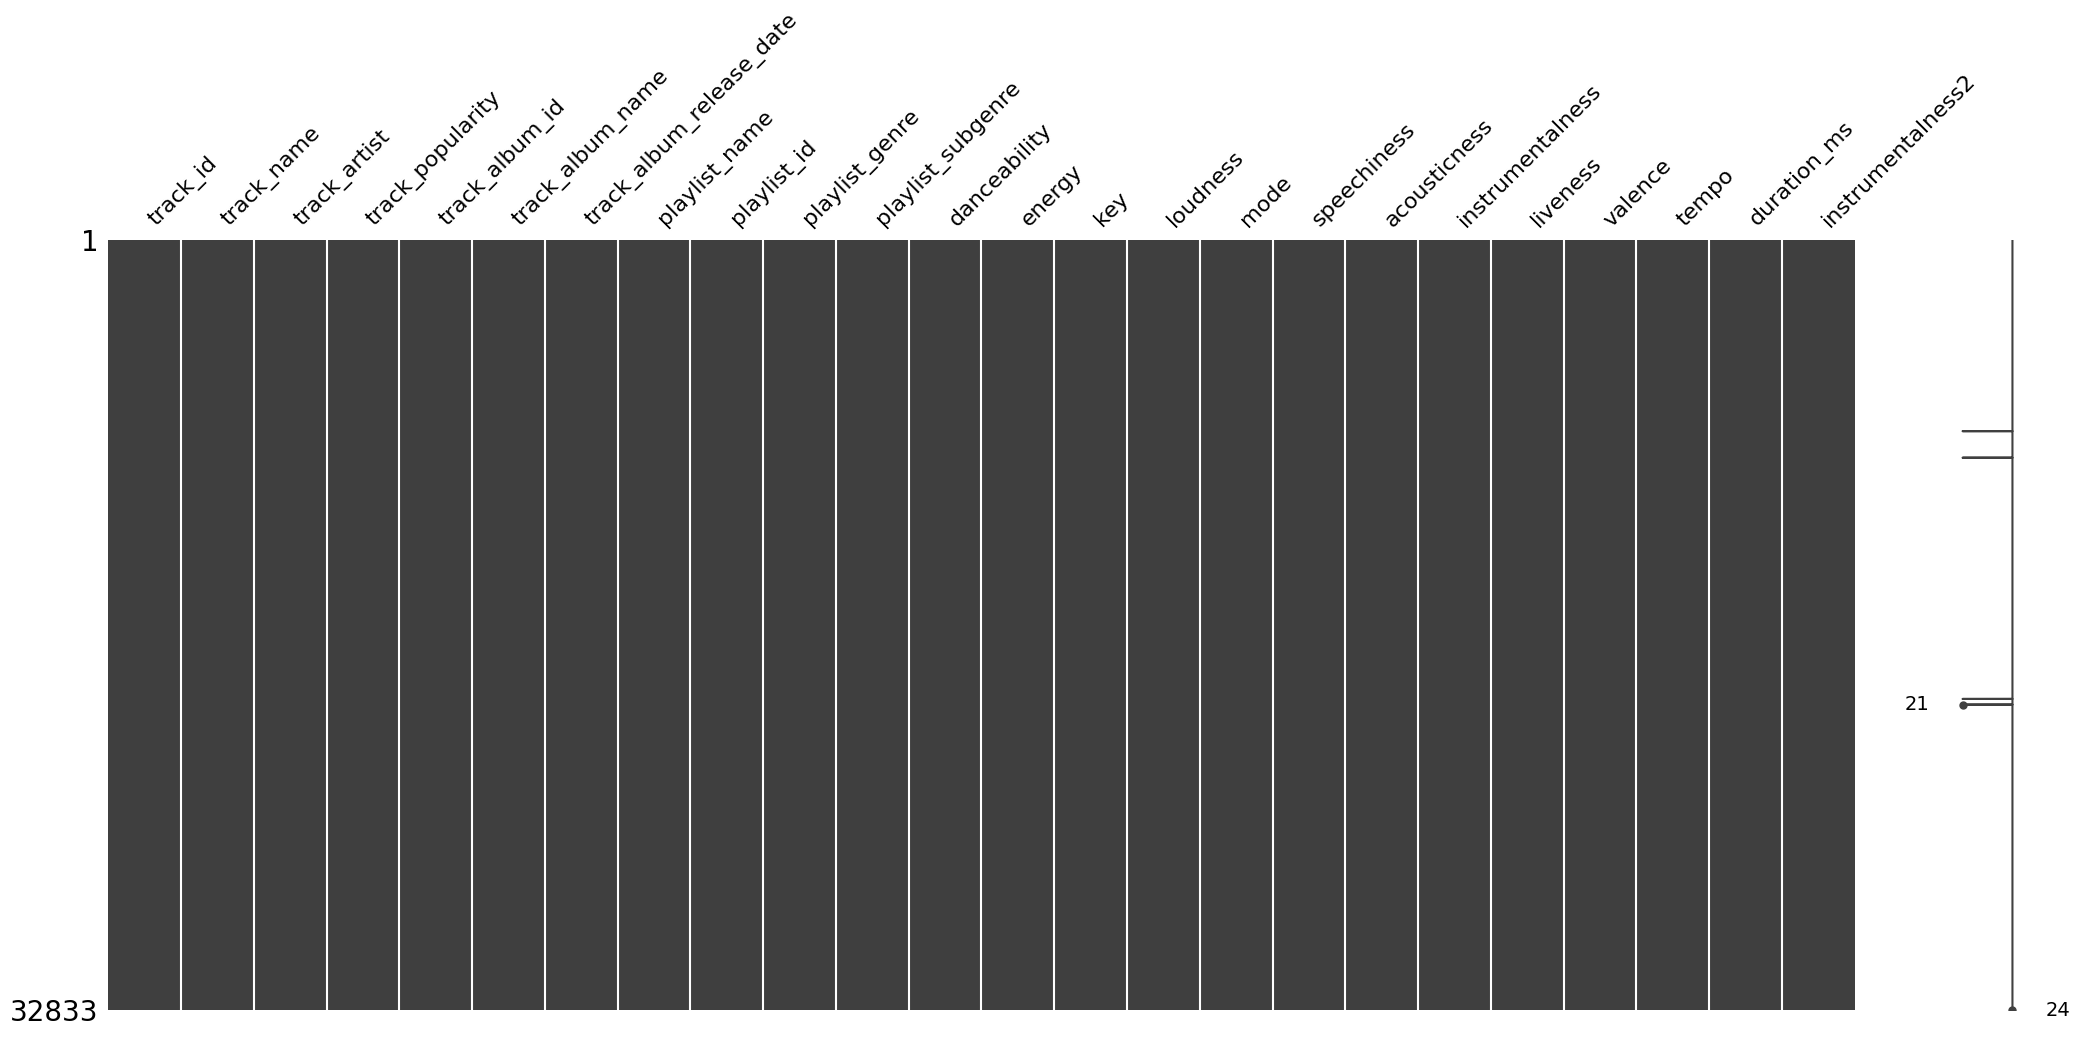

In [ ]:
msno.matrix(ds)

<Axes: >

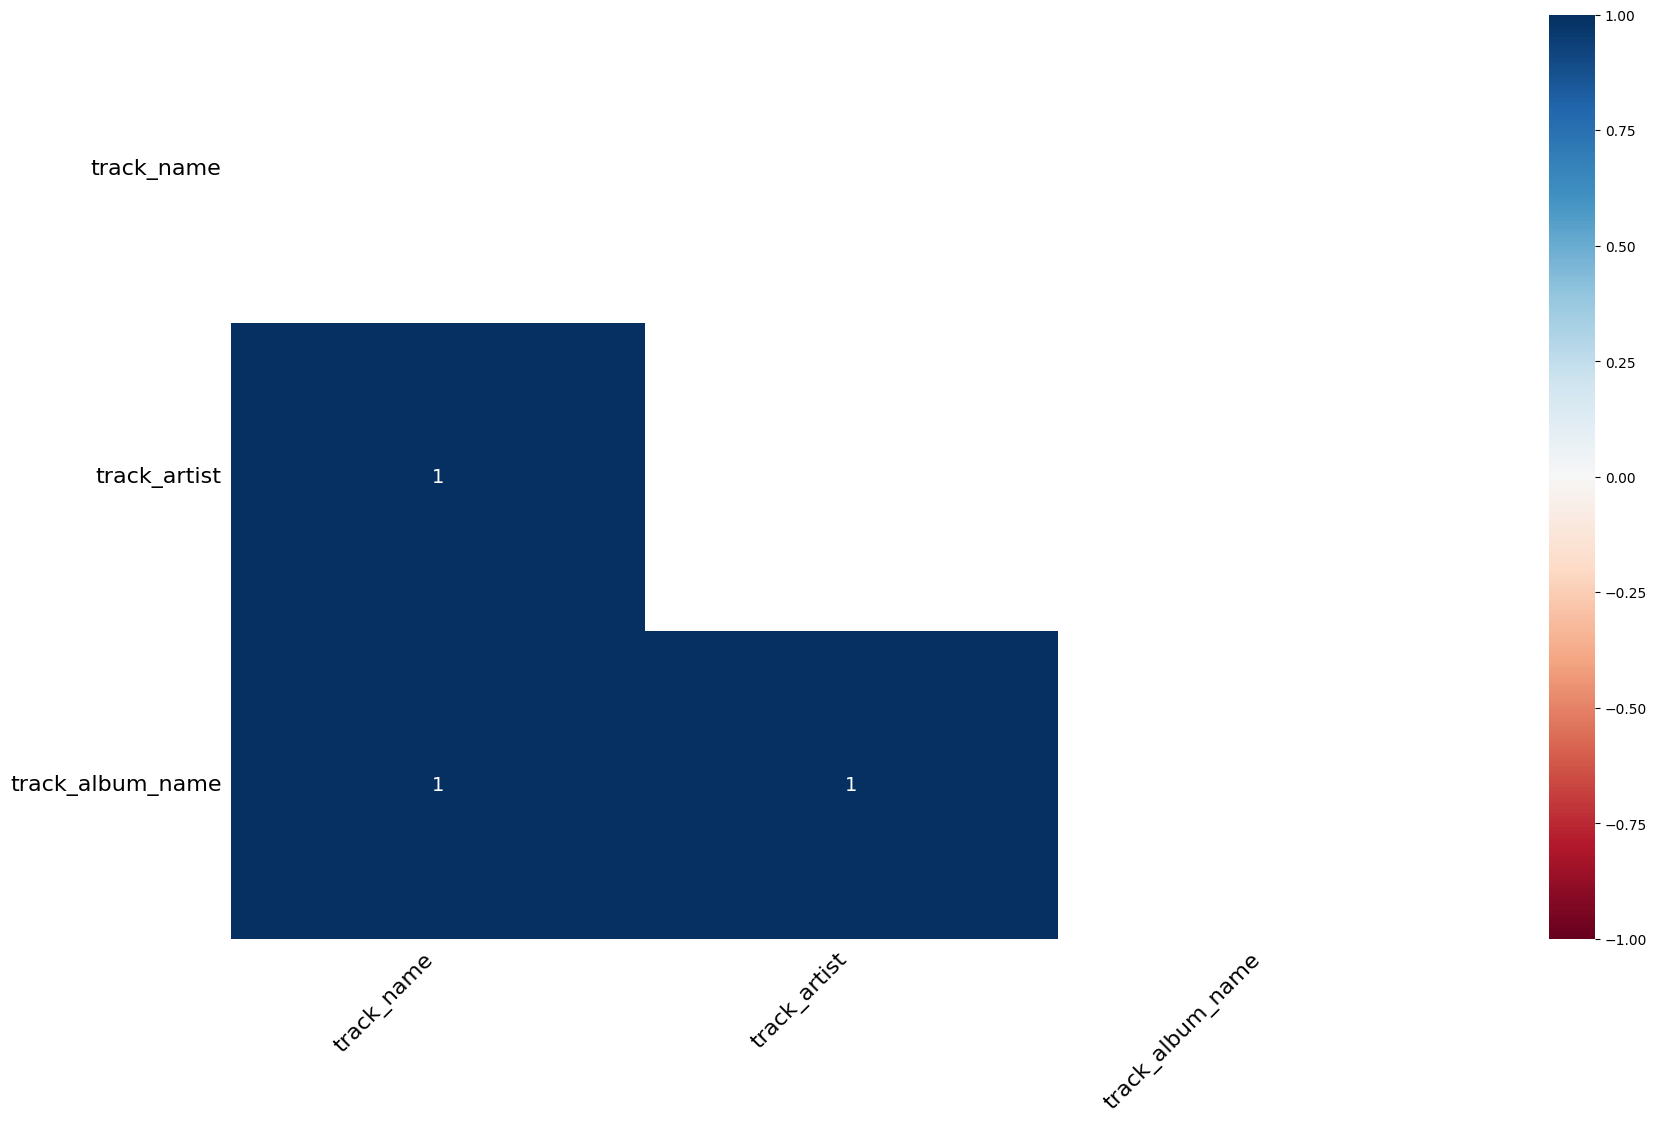

In [ ]:
msno.heatmap(ds)

## 1.5 Check Duplicated
Foi realizada a verificação para identificar registros duplicados.

In [ ]:
ds.duplicated().sum()

0

## 1.6 Tratamento dos Dados


###1.6.1 Juntando as Variáveis com Dados Missing

In [ ]:
df_missing = ds[["loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness"]]


###1.6.2 Describe para analisar suas medidas

In [ ]:
df_missing.describe()

loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.340773      0.760972      0.068326      0.108290   
std        1.892696      0.426496      0.026322      0.095143   
min      -10.000000      0.000000      0.000000      0.000000   
25%       -7.215000      1.000000      0.052900      0.040300   
50%       -6.165000      1.000000      0.062700      0.080400   
75%       -5.266000      1.000000      0.077900      0.142000   
max       -2.330000      1.000000      0.115000      0.294000   

       instrumentalness      liveness  
count      32833.000000  32833.000000  
mean           0.036810      0.188072  
std            0.153827      0.152010  
min            0.000000      0.000000  
25%            0.000017      0.093900  
50%            0.000017      0.127000  
75%            0.000017      0.241000  
max            0.994000      0.996000

- **Loudness**: Média de -6.72 dB, indicando volume moderado nas músicas, com uma variação considerável (desvio padrão de 2.98).

- **Mode**: Média de 0.56, sugerindo equilíbrio entre modos maior (1) e menor (0) nas músicas.

- **Speechiness**: Média de 0.10, indicando baixo conteúdo de fala nas músicas, com maior presença de fala em valores próximos de 1.

- **Acousticness**: Média de 0.17, sugerindo que a maioria das músicas não é predominantemente acústica.

- **Instrumentalness**: Média de 0.08, indicando que a maioria das músicas contém vocais.

- **Liveness**: Média de 0.19, indicando que a maioria das músicas foi gravada em estúdio, não ao vivo.

###Substituindo Dados Missing pela Mediana

In [ ]:
# Preenchendo valores ausentes com a mediana de cada coluna
ds['loudness'].fillna(ds['loudness'].median(), inplace=True)
ds['mode'].fillna(ds['mode'].median(), inplace=True)
ds['speechiness'].fillna(ds['speechiness'].median(), inplace=True)
ds['acousticness'].fillna(ds['acousticness'].median(), inplace=True)
ds['instrumentalness'].fillna(ds['instrumentalness'].median(), inplace=True)
ds['liveness'].fillna(ds['liveness'].median(), inplace=True)

<ipython-input-38-2f3b162093b7>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-38-2f3b162093b7>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

A decisão de substituir os valores ausentes das variáveis loudness, mode, speechiness, instrumentalness e liveness pela mediana, e não pela média, foi tomada para evitar o impacto de outliers (valores extremos) no preenchimento dos dados.

A mediana, sendo o valor central, é menos sensível a esses desvios, garantindo uma imputação mais robusta e fiel à distribuição real dos dados.


###1.6.4 Checando a Correção

<Axes: >

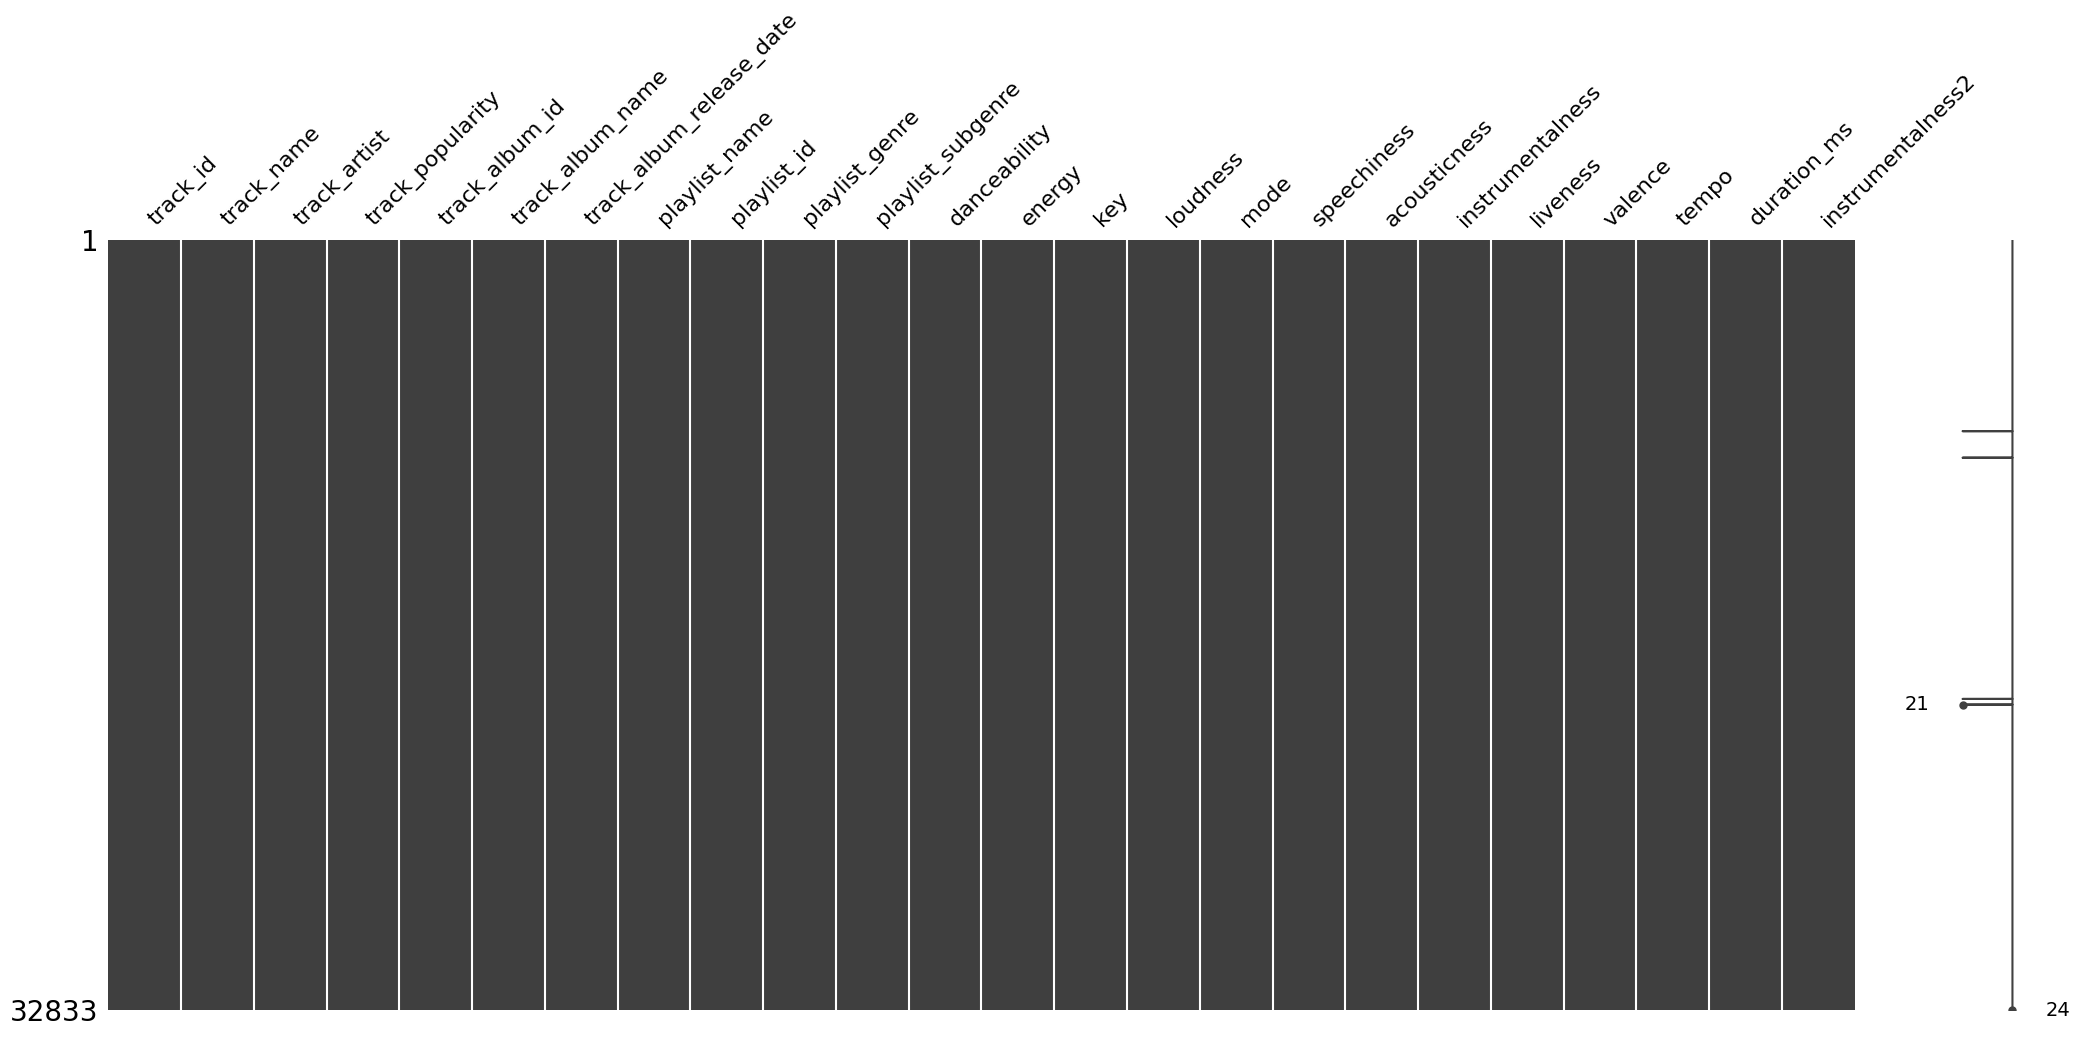

In [ ]:
msno.matrix(ds)

In [ ]:
px.box(ds.loudness, orientation='h')

In [ ]:
ds.loc[ds.loudness<=-10, 'loudness']= -10

In [ ]:
ds.loc[ds.loudness>=-2.33, 'loudness']=-2.33

###Tratando outliers da Speechiness

In [ ]:
px.box(ds.speechiness, orientation='h')

In [ ]:
ds.loc[ds.speechiness>= 0.115, 'speechiness']=0.115

###Tratando Outliers da Acousticness

In [ ]:
px.box(ds.acousticness, orientation='h')

In [ ]:
ds.loc[ds.acousticness>= 0.294, 'acousticness']=0.294

###Tratanto Outliers da instrumentalness

In [ ]:
px.box(ds.instrumentalness, orientation='h')

In [ ]:
ds['instrumentalness2'] = ds.instrumentalness * 100

In [ ]:
px.box(ds.instrumentalness2, orientation='h')

###Tratado Outliers da liveness

In [ ]:
px.box(ds.liveness, orientation='h')

In [ ]:
ds.loc[ds.liveness>= 0.461, 'liveness']=0.461

## 1.6 Descriptive Statistics
Foram calculadas as principais estatísticas descritivas das variáveis numéricas e categóricas para entender melhor a distribuição dos dados.

In [ ]:
ds.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.340773      0.760972      0.068326      0.108290   
std        1.892696      0.426496      0.026322      0.095143   
min      -10.000000      0.000000      0.000000      0.000000   
25%       -7.215000      1.000000      0.052900      0.040300   
50%       -6.165000      1.000000      0.062700      0.080400   
75%       -5.266000      1.000000      0.077900      0.142000   
max       -2.330000      1.000000      0.115000      0.294000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.036810      0.177185      0.510561    120.881132   
std            0.153827      0.117952      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000017      0.093900      0.331000     99.960000   
50%            0.000017      0.127000      0.512000    121.984000   
75%            0.000017      0.241000      0.693000    133.918000   
max            0.994000      0.461000      0.991000    239.440000   

         duration_ms  instrumentalness2  
count   32833.000000       32833.000000  
mean   225799.811622           3.680988  
std     59834.006182          15.382707  
min      4000.000000           0.000000  
25%    187819.000000           0.001730  
50%    216000.000000           0.001730  
75%    253585.000000           0.001730  
max    517810.000000          99.400000

Podemos observar que:


**- Track Popularity:**
A média é 42.48, indicando uma popularidade moderada nas músicas, mas com grande variação (std = 24.98). Há músicas tanto muito populares quanto outras pouco conhecidas.

**- Danceability:**
A média de 0.65 sugere que muitas músicas têm um ritmo moderadamente dançante, com uma variação de ±0.15. As músicas vão de pouco dançantes a muito dançantes, com um pico mais próximo de 0.98.

**- Energy:**
A média de 0.70 reflete músicas de energia moderada a alta. A variação de ±0.18 mostra uma diversidade de energia, de músicas tranquilas a altamente energéticas (com máxima de 1.00).

**- Loudness:**
A média de -6.34 dB indica volume moderado, com uma variação considerável (std = 1.89). As músicas variam de volumes mais baixos (mínimo de -10 dB) a volumes mais altos (máximo de -2.33 dB).

**- Mode:**
A média de 0.76 sugere que a maioria das músicas estão em modo maior, o que é geralmente associado a uma sonoridade mais positiva. A variação (std = 0.43) indica uma mistura de músicas em modo maior e menor.

**- Speechiness:**
Com média de 0.068, a maior parte das músicas tem pouco ou nenhum conteúdo de fala, com alguns picos pequenos (máximo = 0.115), possivelmente relacionadas a gêneros como podcasts ou falas dentro de músicas.

 **- Instrumentalness:**
A média de 0.037 mostra que a maioria das músicas tem vocais, mas a presença de músicas instrumentais é observada em algumas, com valores próximos de 1 indicando músicas totalmente instrumentais.

**- Tempo:**
Com uma média de 120.88 BPM, as músicas tendem a ter um ritmo moderado. A variação de ±26.90 BPM reflete tanto músicas lentas (mínimo de 40 BPM) quanto muito rápidas (máximo de 239.44 BPM).

**- Duration_ms:**
A média de 225,799 ms (aproximadamente 3 minutos e 46 segundos) sugere que a maioria das músicas tem uma duração padrão de música pop, mas com uma grande variação, indo de músicas muito curtas (mínimo de 4 segundos) a músicas muito longas (máximo de 8 minutos e 37 segundos).












## 1.7 Categorical Atributes
Aqui estão as estatísticas descritivas para as variáveis categóricas do dataset:

In [ ]:
ds_num = ds.select_dtypes( include=['int64', 'float64'] )
ds_cat = ds.select_dtypes( exclude=['int64', 'float64'] )

## 1.8  Correspondência
Aqui estão as estatísticas descritivas para as variáveis categóricas do dataset:

In [ ]:
ds_num.corr()

track_popularity  danceability    energy       key  \
track_popularity           1.000000      0.064748 -0.109112 -0.000650   
danceability               0.064748      1.000000 -0.086073  0.011736   
energy                    -0.109112     -0.086073  1.000000  0.010052   
key                       -0.000650      0.011736  0.010052  1.000000   
loudness                   0.050706     -0.004204  0.555275 -0.007261   
mode                       0.008055     -0.033814 -0.003247 -0.110457   
speechiness                0.004944      0.193107  0.049637  0.016041   
acousticness               0.081961      0.040652 -0.370806  0.009499   
instrumentalness          -0.091958     -0.005254  0.022589  0.002035   
liveness                  -0.049919     -0.122802  0.169021  0.002160   
valence                    0.033231      0.330523  0.151103  0.019914   
tempo                     -0.005378     -0.184084  0.149951 -0.013370   
duration_ms               -0.143682     -0.096879  0.012611  0.015139   
instrumentalness2         -0.091958     -0.005254  0.022589  0.002035   

                   loudness      mode  speechiness  acousticness  \
track_popularity   0.050706  0.008055     0.004944      0.081961   
danceability      -0.004204 -0.033814     0.193107      0.040652   
energy             0.555275 -0.003247     0.049637     -0.370806   
key               -0.007261 -0.110457     0.016041      0.009499   
loudness           1.000000 -0.016800     0.061879     -0.174677   
mode              -0.016800  1.000000    -0.047521     -0.004929   
speechiness        0.061879 -0.047521     1.000000      0.018252   
acousticness      -0.174677 -0.004929     0.018252      1.000000   
instrumentalness  -0.061066 -0.004969    -0.037303     -0.059017   
liveness           0.075388 -0.009846     0.049522     -0.064515   
valence            0.037828  0.001363     0.060501      0.048483   
tempo              0.080549  0.005243     0.047856     -0.091767   
duration_ms       -0.119931  0.005358    -0.089854     -0.057799   
instrumentalness2 -0.061066 -0.004969    -0.037303     -0.059017   

                   instrumentalness  liveness   valence     tempo  \
track_popularity          -0.091958 -0.049919  0.033231 -0.005378   
danceability              -0.005254 -0.122802  0.330523 -0.184084   
energy                     0.022589  0.169021  0.151103  0.149951   
key                        0.002035  0.002160  0.019914 -0.013370   
loudness                  -0.061066  0.075388  0.037828  0.080549   
mode                      -0.004969 -0.009846  0.001363  0.005243   
speechiness               -0.037303  0.049522  0.060501  0.047856   
acousticness              -0.059017 -0.064515  0.048483 -0.091767   
instrumentalness           1.000000 -0.008264 -0.104858  0.018782   
liveness                  -0.008264  1.000000 -0.019687  0.023168   
valence                   -0.104858 -0.019687  1.000000 -0.025732   
tempo                      0.018782  0.023168 -0.025732  1.000000   
duration_ms                0.035663 -0.010032 -0.032225 -0.001412   
instrumentalness2          1.000000 -0.008264 -0.104858  0.018782   

                   duration_ms  instrumentalness2  
track_popularity     -0.143682          -0.091958  
danceability         -0.096879          -0.005254  
energy                0.012611           0.022589  
key                   0.015139           0.002035  
loudness             -0.119931          -0.061066  
mode                  0.005358          -0.004969  
speechiness          -0.089854          -0.037303  
acousticness         -0.057799          -0.059017  
instrumentalness      0.035663           1.000000  
liveness             -0.010032          -0.008264  
valence              -0.032225          -0.104858  
tempo                -0.001412           0.018782  
duration_ms           1.000000           0.035663  
instrumentalness2     0.035663           1.000000


- **Loudness** e **energy** têm a correlação mais significativa, o que é esperado, pois o volume e a energia frequentemente estão relacionados.

- **Danceability** está mais relacionada com a **valence** (sentimento da música) do que com outras variáveis como tempo ou energia.

- **Acousticness** mostra uma correlação negativa com **energy**, o que faz sentido considerando que músicas acústicas podem ter um estilo mais suave.

## 1.9  Criação de Dummies Categóricas
Aqui estão as estatísticas descritivas para as variáveis categóricas do dataset:

In [ ]:
ds_cat.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist          track_album_id  \
0        Ed Sheeran  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre playlist_subgenre  
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop  
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop         dance pop

In [ ]:
# Gerar dummies para 'playlist_genre' primeiro e depois 'playlist_subgenre'
ds_dummies = pd.get_dummies(ds, columns=['playlist_genre', 'playlist_subgenre'], drop_first=True)

# Identificar as colunas criadas pelas dummies
dummy_columns = [col for col in ds_dummies.columns if 'playlist_genre_' in col or 'playlist_subgenre_' in col]

# Converter apenas as colunas de dummies para inteiros
ds_dummies[dummy_columns] = ds_dummies[dummy_columns].astype(int)


In [ ]:
ds_dummies.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'instrumentalness2',
       'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b',
       'playlist_genre_rap', 'playlist_genre_rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_subgenre_latin hip hop', 'playlist_subgenre_latin pop',
       'playlist_subgenre_neo soul', 'playlist_subgenre_new jack swing',
   

In [ ]:
ds_dummies.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id  danceability  ...  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.748  ...   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.726  ...   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.675  ...   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.718  ...   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW         0.650  ...   

   playlist_subgenre_new jack swing  playlist_subgenre_permanent wave  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   playlist_subgenre_pop edm  playlist_subgenre_post-teen pop  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   playlist_subgenre_progressive electro house  playlist_subgenre_reggaeton  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            0   

   playlist_subgenre_southern hip hop  playlist_subgenre_trap  \
0                                   0                       0   
1                                   0                       0   
2                                   0                       0   
3                                   0                       0   
4                                   0                       0   

   playlist_subgenre_tropical  playlist_subgenre_urban contemporary  
0                           0                                     0  
1                           0                                     0  
2                           0                                     0  
3                           0                                     0  
4                           0                                     0  

[5 rows x 50 columns]

<Axes: >

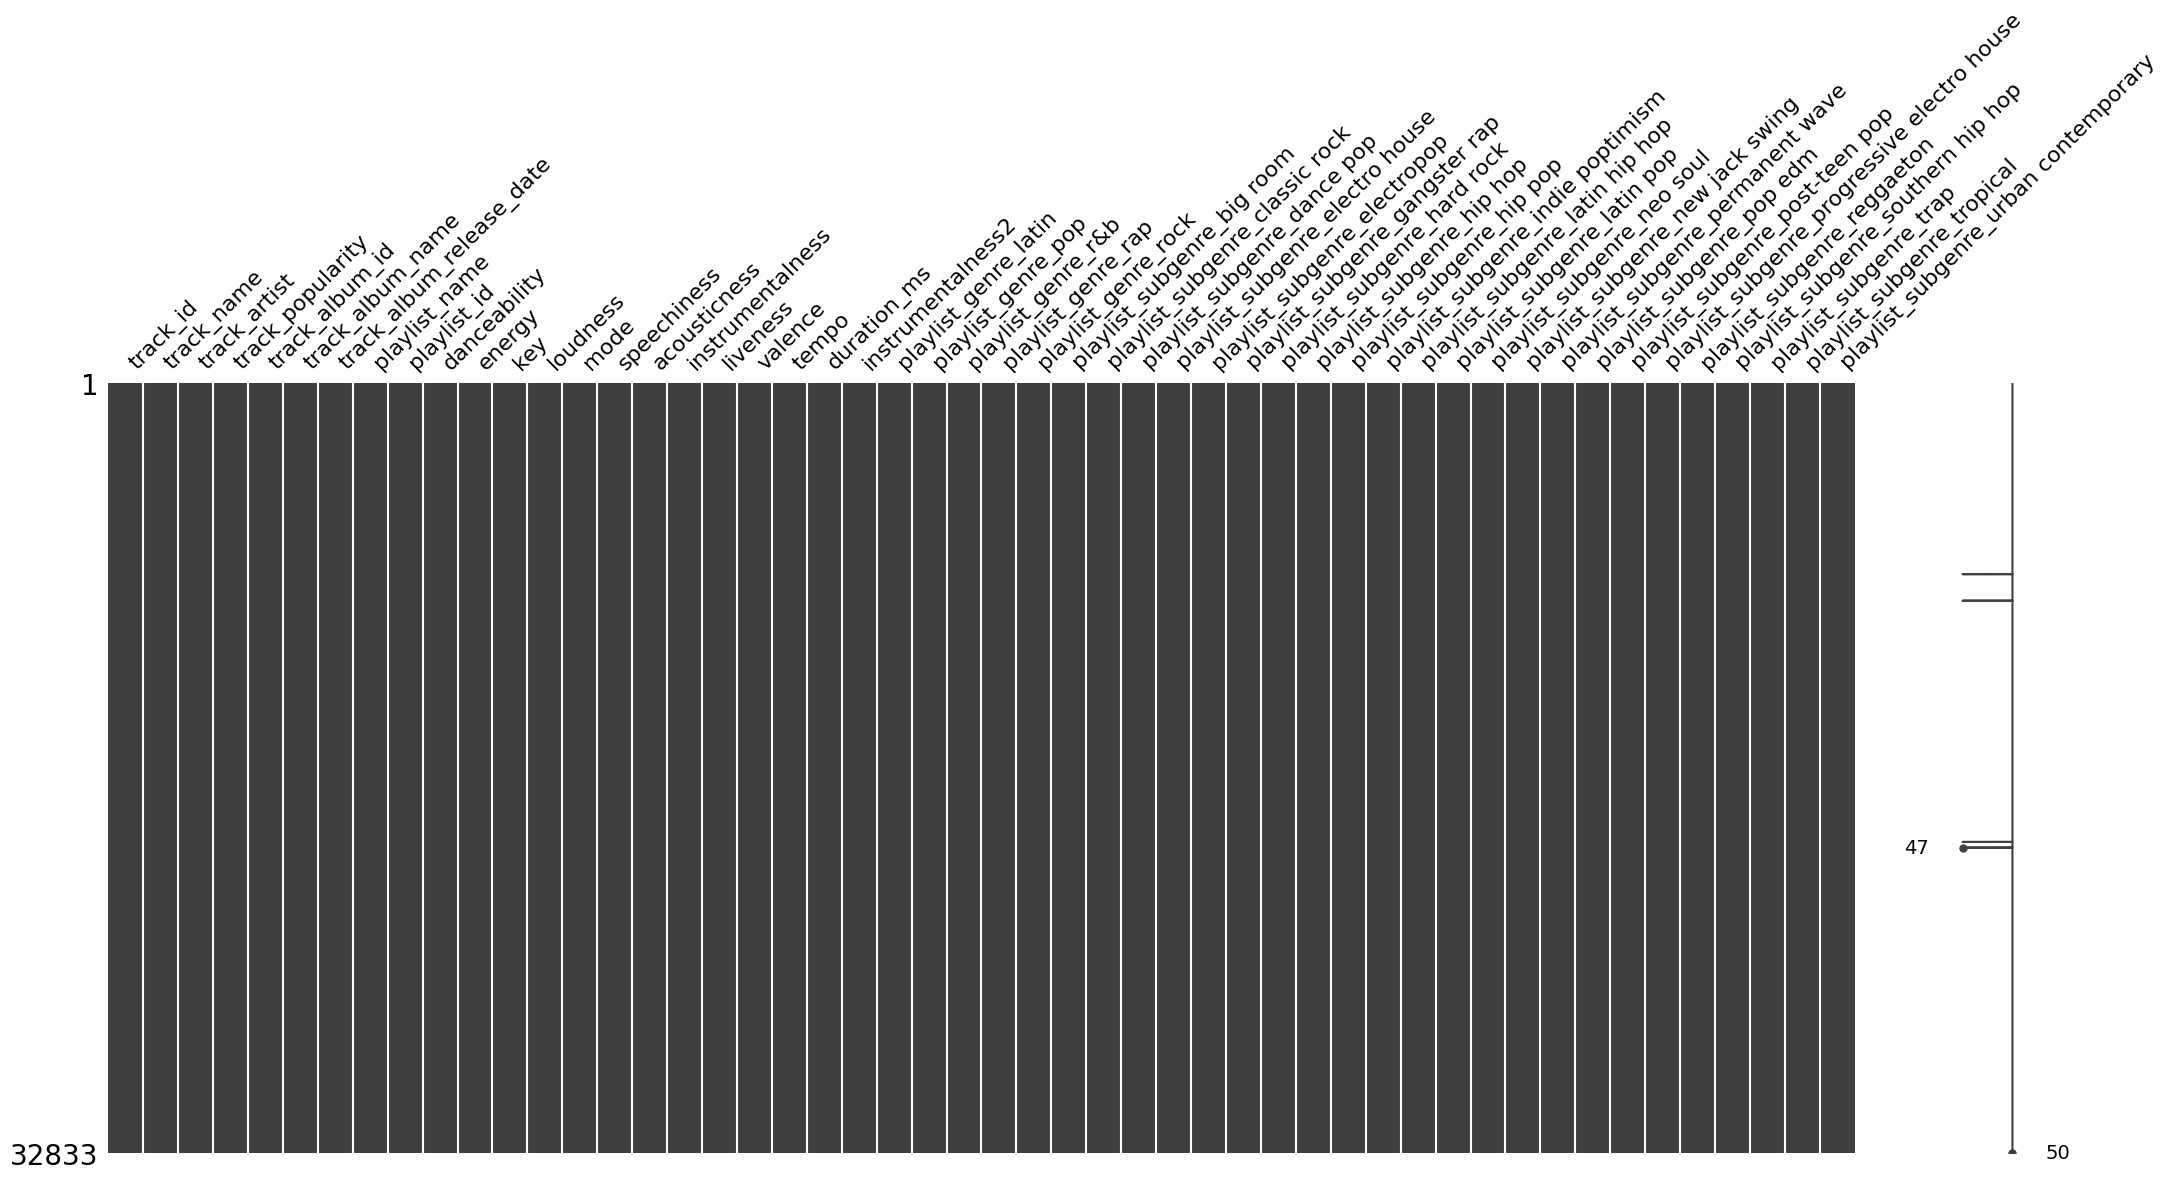

In [ ]:
msno.matrix(ds_dummies)

###Retirando Variáveis Identificadoras

In [ ]:
# Remover as colunas 'track_id' e 'playlist_id' do DataFrame ds_dummies
ds_dummies = ds_dummies.drop(['track_id', 'playlist_id','track_album_id'], axis=1)

# Exibir as primeiras linhas do DataFrame atualizado
print(ds_dummies.head())


                                          track_name      track_artist  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                    Memories - Dillon Francis Remix          Maroon 5   
2                    All the Time - Don Diablo Remix      Zara Larsson   
3                  Call You Mine - Keanu Silva Remix  The Chainsmokers   
4            Someone You Loved - Future Humans Remix     Lewis Capaldi   

   track_popularity                                   track_album_name  \
0                66  I Don't Care (with Justin Bieber) [Loud Luxury...   
1                67                    Memories (Dillon Francis Remix)   
2                70                    All the Time (Don Diablo Remix)   
3                60                        Call You Mine - The Remixes   
4                69            Someone You Loved (Future Humans Remix)   

  track_album_release_date playlist_name  danceability  energy  key  loudness  \
0               2019-06-14   

In [ ]:
ds_dummies.columns

Index(['track_name', 'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'instrumentalness2', 'playlist_genre_latin', 'playlist_genre_pop',
       'playlist_genre_r&b', 'playlist_genre_rap', 'playlist_genre_rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_subgenre_latin hip hop', 'playlist_subgenre_latin pop',
       'playlist_subgenre_neo soul', 'playlist_subgenre_new jack swing',
       'playlist_subgenre_permanent wave', 'playlist_su

# **2.0. Análise dos Gráficos**

A análise exploratória dos dados (EDA) foi conduzida com o objetivo de entender a distribuição das variáveis e identificar padrões, outliers ou qualquer outro comportamento incomum que possa impactar os resultados do modelo de machine learning.

## 3.1. Análise de Gráficos

Nesta etapa, foram analisadas as variáveis de forma individual para entender melhor suas distribuições e valores.

###3.1.1 Variáveis Categóricas

<ipython-input-62-d6eedf88191c>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




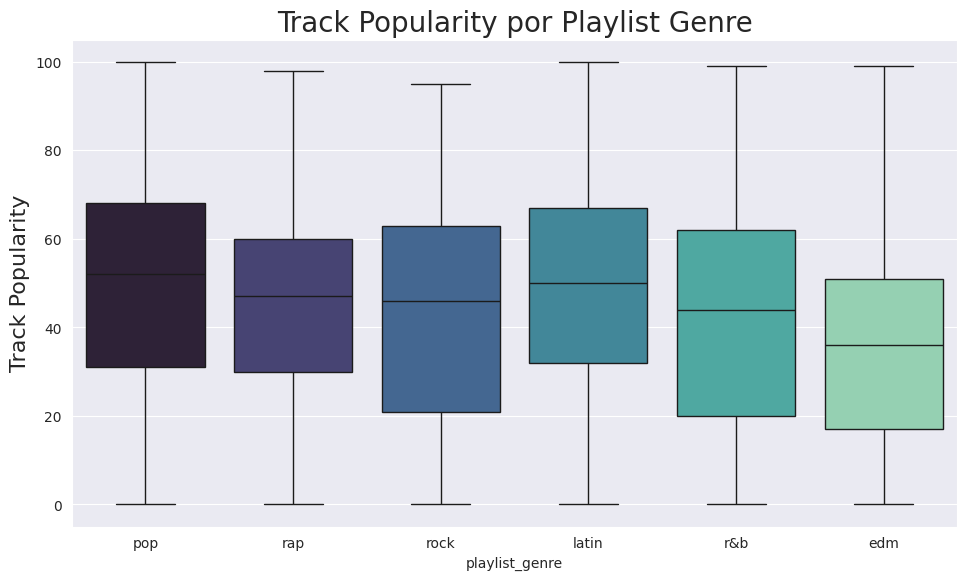

In [ ]:
# Define o estilo dos gráficos
sns.set_style("darkgrid")

# Define o tamanho da figura
plt.figure(figsize=(20, 18))  # Aumentando o tamanho da figura

# Gráfico 1: Distribuição de 'track_popularity' por 'playlist_genre'
plt.subplot(3, 2, 1)  # Ajustando o layout para 3 linhas e 2 colunas
sns.boxplot(data=ds, x='playlist_genre', y='track_popularity', palette='mako')
plt.title('Track Popularity por Playlist Genre', fontsize=20)
plt.ylabel('Track Popularity', fontsize=16)

# Exibe todos os gráficos juntos
plt.tight_layout(pad=4.0)  # Aumenta o espaçamento entre os gráficos
plt.show()


O gráfico sugere que pop e rap se destacam como gêneros com músicas mais populares em média, enquanto gêneros como EDM e rock têm uma distribuição mais dispersa e uma mediana de popularidade mais baixa. A Latin e o R&B estão em um nível intermediário, com boas variações dentro de suas distribuições.

###3.1.2 Variáveis Numéricas

<ipython-input-63-b86732af7fdb>:9: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-63-b86732af7fdb>:15: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-63-b86732af7fdb>:21: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-63-b86732af7fdb>:27: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



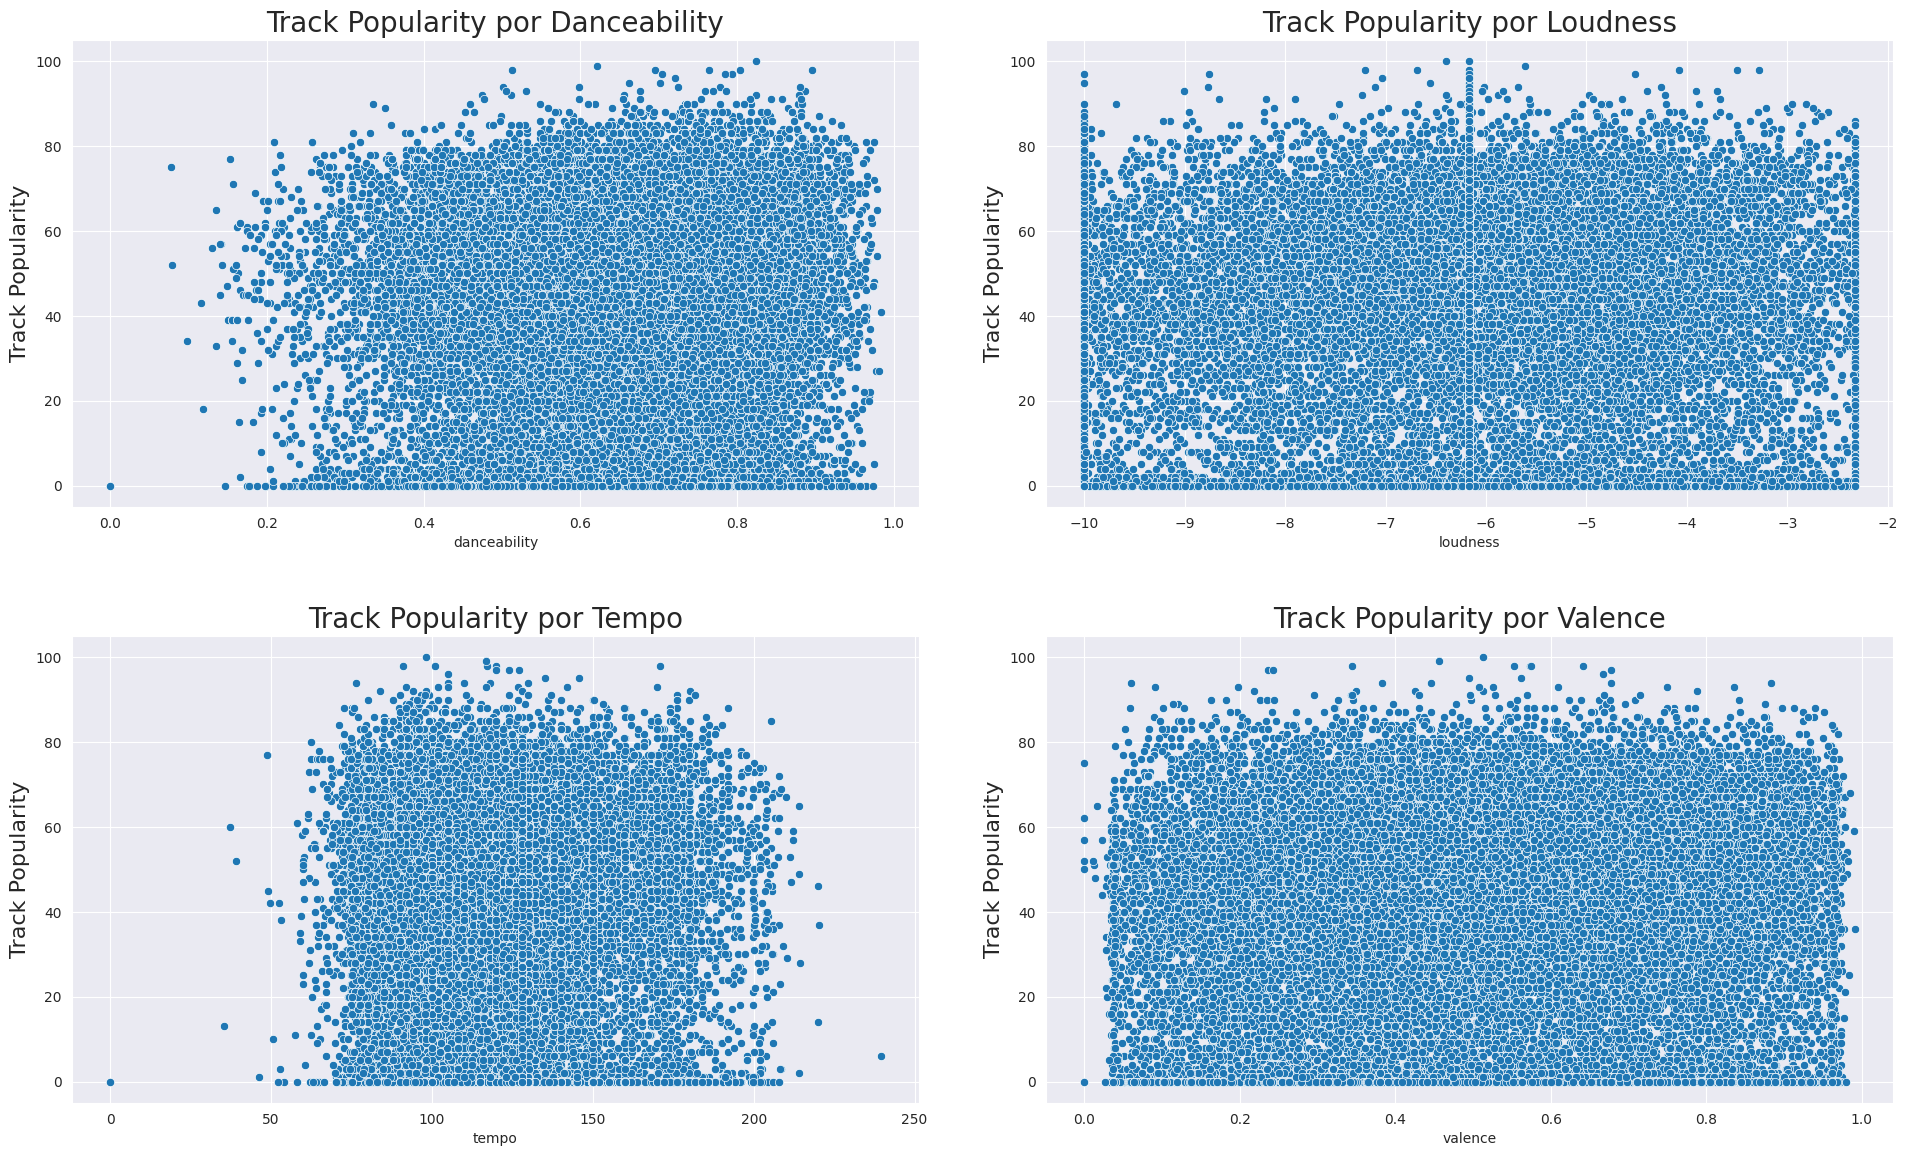

In [ ]:
# Define o estilo dos gráficos
sns.set_style("darkgrid")

# Define o tamanho da figura
plt.figure(figsize=(20, 18))  # Aumentando o tamanho da figura

# Gráfico 1: Distribuição de 'track_popularity' por 'danceability'
plt.subplot(3, 2, 1)  # Ajustando o layout para 3 linhas e 2 colunas
sns.scatterplot(data=ds_dummies, x='danceability', y='track_popularity', palette='mako')
plt.title('Track Popularity por Danceability', fontsize=20)
plt.ylabel('Track Popularity', fontsize=16)

# Gráfico 2: Distribuição de 'track_popularity' por 'loudness'
plt.subplot(3, 2, 2)  # Ajustando o layout para 3 linhas e 2 colunas
sns.scatterplot(data=ds_dummies, x='loudness', y='track_popularity', palette='mako')
plt.title('Track Popularity por Loudness', fontsize=20)
plt.ylabel('Track Popularity', fontsize=16)

# Gráfico 3: Distribuição de 'track_popularity' por 'tempo'
plt.subplot(3, 2, 3)  # Ajustando o layout para 3 linhas e 2 colunas
sns.scatterplot(data=ds_dummies, x='tempo', y='track_popularity', palette='mako')
plt.title('Track Popularity por Tempo', fontsize=20)
plt.ylabel('Track Popularity', fontsize=16)

# Gráfico 4: Distribuição de 'track_popularity' por 'valence'
plt.subplot(3, 2, 4)  # Ajustando o layout para 3 linhas e 2 colunas
sns.scatterplot(data=ds_dummies, x='valence', y='track_popularity', palette='mako')
plt.title('Track Popularity por Valence', fontsize=20)
plt.ylabel('Track Popularity', fontsize=16)

# Exibe todos os gráficos juntos
plt.tight_layout(pad=4.0)  # Aumenta o espaçamento entre os gráficos
plt.show()


coment

##3.3 Análise Multivariada
A análise multivariada foi realizada para explorar as relações entre múltiplas variáveis numéricas simultaneamente. A correlação entre as variáveis numéricas foi visualizada através de um heatmap, que ajuda a identificar a força e a direção das relações entre elas.

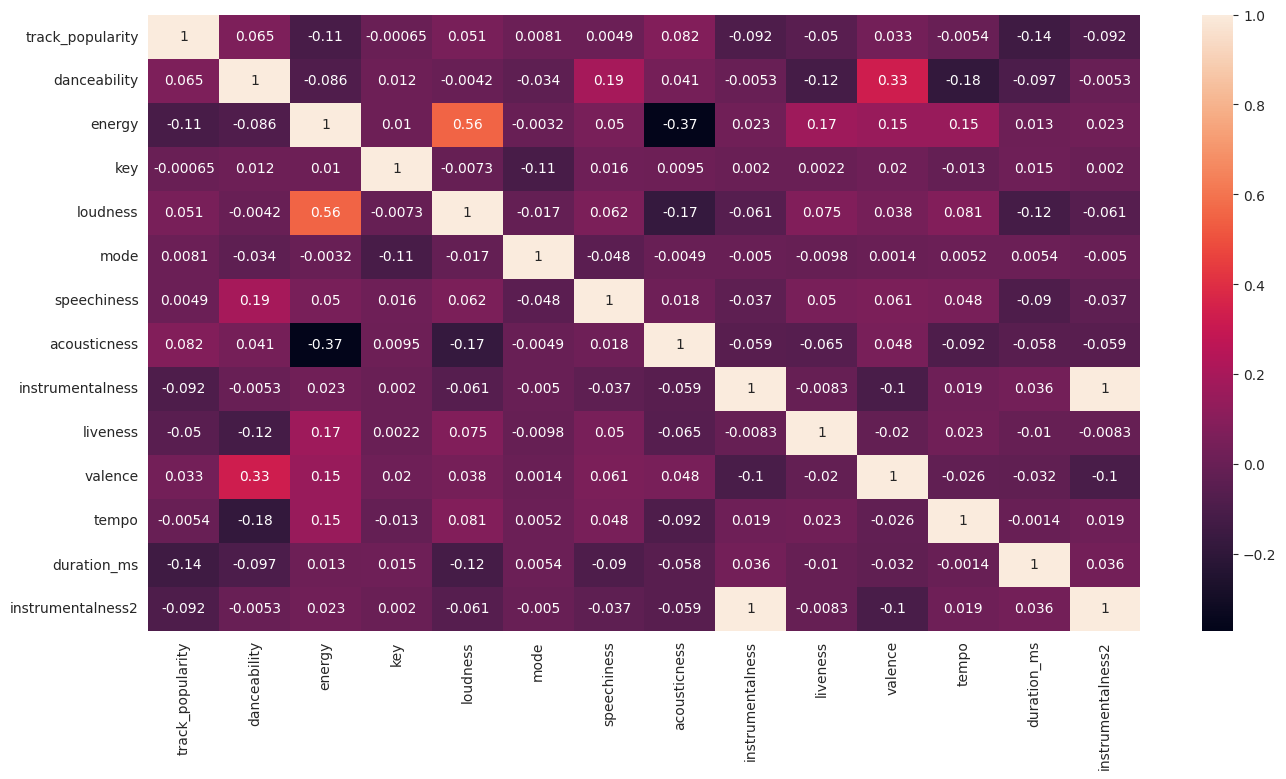

In [ ]:
correlation =  ds_num.corr()
plt.figure( figsize=(16, 8) )
sns.heatmap( correlation, annot=True );


- **Loudness** e **energy** têm a correlação mais significativa, o que é esperado, pois o volume e a energia frequentemente estão relacionados.

- **Danceability** está mais relacionada com a **valence** (sentimento da música) do que com outras variáveis como tempo ou energia.

- **Acousticness** mostra uma correlação negativa com **energy**, o que faz sentido considerando que músicas acústicas podem ter um estilo mais suave.

#**3.0 Clusterização**
Realizei a clusterização para agrupar as músicas com base em características sonoras similares, visando identificar padrões e melhorar a compreensão dos dados. Ao incluir os clusters nos modelos preditivos, espero aprimorar as previsões, já que essa variável traz informações adicionais sobre os perfis das músicas que as variáveis originais não capturam.

In [ ]:
ds_clus = ds_dummies.copy()

In [ ]:
# Seleciona apenas as colunas numéricas do dataframe ds_dummies e cria o ds_clus
ds_clus = ds_dummies.select_dtypes(include=['float64', 'int64'])


In [ ]:
ds_clus.head()

track_popularity  danceability  energy  key  loudness  mode  speechiness  \
0                66         0.748   0.916    6    -6.165   1.0       0.0583   
1                67         0.726   0.815   11    -4.969   1.0       0.0373   
2                70         0.675   0.931    1    -3.432   1.0       0.0742   
3                60         0.718   0.930    7    -3.778   1.0       0.1020   
4                69         0.650   0.833    1    -6.165   1.0       0.0359   

   acousticness  instrumentalness  liveness  ...  \
0        0.1020          0.000000    0.0653  ...   
1        0.0724          0.000017    0.3570  ...   
2        0.0804          0.000017    0.1100  ...   
3        0.0287          0.000017    0.2040  ...   
4        0.0804          0.000017    0.0833  ...   

   playlist_subgenre_new jack swing  playlist_subgenre_permanent wave  \
0                                 0                                 0   
1                                 0                                 0   
2                                 0                                 0   
3                                 0                                 0   
4                                 0                                 0   

   playlist_subgenre_pop edm  playlist_subgenre_post-teen pop  \
0                          0                                0   
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   

   playlist_subgenre_progressive electro house  playlist_subgenre_reggaeton  \
0                                            0                            0   
1                                            0                            0   
2                                            0                            0   
3                                            0                            0   
4                                            0                            0   

   playlist_subgenre_southern hip hop  playlist_subgenre_trap  \
0                                   0                       0   
1                                   0                       0   
2                                   0                       0   
3                                   0                       0   
4                                   0                       0   

   playlist_subgenre_tropical  playlist_subgenre_urban contemporary  
0                           0                                     0  
1                           0                                     0  
2                           0                                     0  
3                           0                                     0  
4                           0                                     0  

[5 rows x 42 columns]

In [ ]:
ds_clus.columns

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'instrumentalness2',
       'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b',
       'playlist_genre_rap', 'playlist_genre_rock',
       'playlist_subgenre_big room', 'playlist_subgenre_classic rock',
       'playlist_subgenre_dance pop', 'playlist_subgenre_electro house',
       'playlist_subgenre_electropop', 'playlist_subgenre_gangster rap',
       'playlist_subgenre_hard rock', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_indie poptimism',
       'playlist_subgenre_latin hip hop', 'playlist_subgenre_latin pop',
       'playlist_subgenre_neo soul', 'playlist_subgenre_new jack swing',
       'playlist_subgenre_permanent wave', 'playlist_subgenre_pop edm',
       'playlist_subgenre_post-teen pop',
       'playlist_subgenre_progressive elect

In [ ]:
ds_clus.corr()

track_popularity  danceability  \
track_popularity                                     1.000000      0.064748   
danceability                                         0.064748      1.000000   
energy                                              -0.109112     -0.086073   
key                                                 -0.000650      0.011736   
loudness                                             0.050706     -0.004204   
mode                                                 0.008055     -0.033814   
speechiness                                          0.004944      0.193107   
acousticness                                         0.081961      0.040652   
instrumentalness                                    -0.091958     -0.005254   
liveness                                            -0.049919     -0.122802   
valence                                              0.033231      0.330523   
tempo                                               -0.005378     -0.184084   
duration_ms                                         -0.143682     -0.096879   
instrumentalness2                                   -0.091958     -0.005254   
playlist_genre_latin                                 0.078588      0.173830   
playlist_genre_pop                                   0.094654     -0.048109   
playlist_genre_r&b                                  -0.022337      0.047040   
playlist_genre_rap                                   0.013612      0.201596   
playlist_genre_rock                                 -0.012629     -0.390075   
playlist_subgenre_big room                          -0.079680     -0.047510   
playlist_subgenre_classic rock                      -0.013531     -0.152935   
playlist_subgenre_dance pop                          0.077976      0.001262   
playlist_subgenre_electro house                     -0.061247      0.070817   
playlist_subgenre_electropop                         0.002102     -0.023694   
playlist_subgenre_gangster rap                      -0.063314      0.102784   
playlist_subgenre_hard rock                         -0.057811     -0.250178   
playlist_subgenre_hip hop                            0.092609      0.091453   
playlist_subgenre_hip pop                            0.090745      0.028282   
playlist_subgenre_indie poptimism                   -0.000015     -0.040319   
playlist_subgenre_latin hip hop                      0.008985      0.108474   
playlist_subgenre_latin pop                          0.069004      0.043080   
playlist_subgenre_neo soul                          -0.089762     -0.015527   
playlist_subgenre_new jack swing                    -0.109302      0.089280   
playlist_subgenre_permanent wave                     0.086080     -0.159663   
playlist_subgenre_pop edm                            0.028271     -0.010780   
playlist_subgenre_post-teen pop                      0.108377     -0.025004   
playlist_subgenre_progressive electro house         -0.150867     -0.014883   
playlist_subgenre_reggaeton                          0.071763      0.126172   
playlist_subgenre_southern hip hop                  -0.055971      0.095616   
playlist_subgenre_trap                               0.063415      0.084441   
playlist_subgenre_tropical                           0.006879      0.051926   
playlist_subgenre_urban contemporary                 0.068100     -0.004267   

                                               energy       key  loudness  \
track_popularity                            -0.109112 -0.000650  0.050706   
danceability                                -0.086073  0.011736 -0.004204   
energy                                       1.000000  0.010052  0.555275   
key                                          0.010052  1.000000 -0.007261   
loudness                                     0.555275 -0.007261  1.000000   
mode                                        -0.003247 -0.110457 -0.016800   
speechiness                                  0.049637  0.016041  0.061879   
acousticness                   

In [ ]:
# Build and fit models
wcss_scores = []
iterations = list(range(2,20))

for k in iterations:

    model = KMeans(n_clusters=k)
    model.fit(ds_clus)
    wcss_scores.append(model.inertia_)

<Axes: >

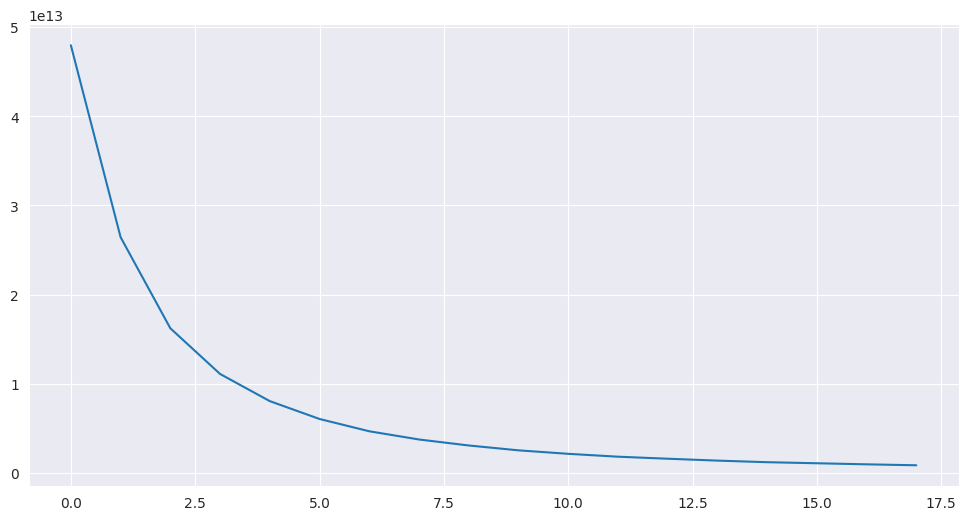

In [ ]:
# Plot performances
plt.figure(figsize=(12,6))
sns.lineplot(wcss_scores)

Podemos notar quedas em 2 e 3 vamos checar plotando com esse quantidade de K

###Clusterizando

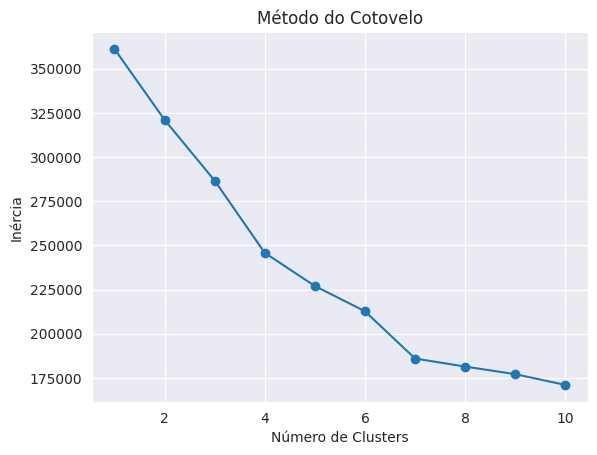

   Cluster  danceability  energy  speechiness  acousticness  loudness  \
0        2         0.748   0.916       0.0583        0.1020    -6.165   
1        2         0.726   0.815       0.0373        0.0724    -4.969   
2        2         0.675   0.931       0.0742        0.0804    -3.432   
3        2         0.718   0.930       0.1020        0.0287    -3.778   
4        2         0.650   0.833       0.0359        0.0804    -6.165   

   valence    tempo  
0    0.518  122.036  
1    0.693   99.972  
2    0.613  124.008  
3    0.277  121.956  
4    0.725  123.976  
Centros dos Clusters:
[[-0.15839533  0.32167869 -0.1408689  -0.14956578  0.13917038 -0.00813248
   0.09903919 -0.44892057 -0.44451955 -0.45777649 -0.20231054]
 [ 0.4462446  -0.2683139   0.60227818  0.10020833 -0.09317012 -0.02290053
  -0.01036905 -0.44892057 -0.44519345  2.17118907  0.95713473]
 [-0.10716487  0.01331386 -0.26212532 -0.03245032  0.11140644 -0.0301959
  -0.00512776  2.22756556 -0.44519345 -0.46057712 -0.2023105

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

columns = [
    'danceability', 'energy', 'speechiness', 'acousticness', 'loudness',
    'valence', 'tempo',
    'playlist_genre_pop', 'playlist_genre_r&b', 'playlist_genre_rap',
    'playlist_subgenre_trap'
]

X = ds_clus[columns]

# Normalize os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Escolha o número de clusters (k) com base no método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Após escolher o número de clusters, aplique o KMeans com o número escolhido (exemplo: 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adicione as predições de cluster ao DataFrame original
ds_clus['Cluster'] = y_kmeans

# Exiba os clusters no DataFrame
print(ds_clus[['Cluster', 'danceability', 'energy', 'speechiness', 'acousticness', 'loudness', 'valence', 'tempo']].head())

# Opcional: Exiba o centro dos clusters
print("Centros dos Clusters:")
print(kmeans.cluster_centers_)


**Centros dos Clusters:**
- O primeiro vetor representa o centro do cluster 0. Cada valor neste vetor indica o valor médio de cada característica para as músicas que estão no
cluster 0. Por exemplo, a danceability média no cluster 0 é -0.158.

- O segundo vetor representa o centro do cluster 1. Aqui, a danceability média é 0.446, ou seja, músicas nesse cluster tendem a ser mais dançáveis.

- O terceiro vetor representa o centro do cluster 2, e a danceability média é -0.107.

- O quarto vetor representa o centro do cluster 3, com a danceability média sendo 0.100.

**Interpretação:**
- O cluster 0 parece ter músicas com características mais equilibradas entre energia e dançabilidade, mas com menor valência e tempo.

- O cluster 1 tem músicas com características opostas (mais "energéticas", mas também com um maior valor para speechiness e tempo), talvez músicas mais animadas.

- O cluster 2 tem músicas com uma danceability média mais baixa, sugerindo que as músicas são mais suaves ou menos dançáveis.

- O cluster 3 tem músicas que se destacam em características como tempo e valence.

###Teste clusters Danceability e Valence

In [ ]:
# Definindo o modelo KMeans com 2 clusters
model = KMeans(n_clusters=2)

# Criando a variável 'labels' com os rótulos dos clusters
X['labels'] = model.fit_predict(ds_clus).astype(str)

# Plotando o gráfico de dispersão, usando duas variáveis numéricas do dataset
# Como exemplo, substitua 'danceability' e 'energy' pelas variáveis de sua escolha
fig = px.scatter(X, x='danceability', y='valence', color='labels', title="Clusters de Música", labels={'danceability': 'Danceability', 'valence': 'valence'})

# Exibindo o gráfico
fig.show()


<ipython-input-73-7ddfd64f996d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Definindo o modelo KMeans com 3 clusters
model = KMeans(n_clusters=3)

# Criando a variável 'labels' com os rótulos dos clusters
X['labels'] = model.fit_predict(ds_clus).astype(str)

# Plotando o gráfico de dispersão, usando duas variáveis numéricas do dataset
# Como exemplo, substitua 'danceability' e 'energy' pelas variáveis de sua escolha
fig = px.scatter(X, x='danceability', y='valence', color='labels', title="Clusters de Música", labels={'danceability': 'Danceability', 'valence': 'valence'})

# Exibindo o gráfico
fig.show()


<ipython-input-74-1eecc6cdeefb>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###Testando Clusters usando Loudness e Energy

In [ ]:
# Definindo o modelo KMeans com 2 clusters
model = KMeans(n_clusters=2)

# Criando a variável 'labels' com os rótulos dos clusters
X['labels'] = model.fit_predict(ds_clus).astype(str)

# Plotando o gráfico de dispersão, usando duas variáveis numéricas do dataset
# Como exemplo, substitua 'danceability' e 'energy' pelas variáveis de sua escolha
fig = px.scatter(X, x='loudness', y='energy', color='labels', title="Clusters de Música", labels={'loudness': 'loudness', 'energy': 'energy'})

# Exibindo o gráfico
fig.show()


<ipython-input-75-fcd8b2aef30b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Definindo o modelo KMeans com 3 clusters
model = KMeans(n_clusters=3)

# Criando a variável 'labels' com os rótulos dos clusters
X['labels'] = model.fit_predict(ds_clus).astype(str)

# Plotando o gráfico de dispersão, usando duas variáveis numéricas do dataset
# Como exemplo, substitua 'danceability' e 'energy' pelas variáveis de sua escolha
fig = px.scatter(X, x='loudness', y='energy', color='labels', title="Clusters de Música", labels={'loudness': 'loudness', 'energy': 'energy'})

# Exibindo o gráfico
fig.show()


<ipython-input-76-f3b3c3c6ee2e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#**4.0 Modelagem**

##**FEATURE SELECTION**

A seleção de variáveis (features) é uma etapa importante no processo de modelagem, pois ajuda a identificar as variáveis que mais contribuem para a previsão do target.


In [ ]:
X = ds_clus.drop('track_popularity', axis=1)
y = ds_clus['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Incluindo o cluster como variável de entrada
X['cluster'] = kmeans.labels_  # ou o nome da sua coluna de clusters

In [ ]:

from sklearn.feature_selection import SelectKBest, f_regression

# Inicializar o modelo de regressão K-Nearest Neighbors
regressor = KNeighborsRegressor(n_neighbors=3)

# Configurar o SelectKBest com a função de pontuação f_regression
# e selecionar as 10 melhores features
selector = SelectKBest(score_func=f_regression, k=10)

# Aplicar o seletor aos dados
selector = selector.fit(X, y)

# Obter as features selecionadas
best_features = X.columns[selector.get_support()]

# Mostrar as melhores features
print("Melhores features:", best_features)

Melhores features: Index(['energy', 'instrumentalness', 'duration_ms', 'instrumentalness2',
       'playlist_genre_pop', 'playlist_subgenre_hip hop',
       'playlist_subgenre_hip pop', 'playlist_subgenre_new jack swing',
       'playlist_subgenre_post-teen pop',
       'playlist_subgenre_progressive electro house'],
      dtype='object')


In [ ]:
finais = ['energy','duration_ms','instrumentalness', 'duration_ms', 'loudness','acousticness',
       'valence', 'danceability','playlist_subgenre_new jack swing',
       'playlist_subgenre_progressive electro house','Cluster']

In [ ]:
X = ds_clus[finais]

In [ ]:
X

energy  duration_ms  instrumentalness  duration_ms  loudness  \
0       0.916       194754          0.000000       194754    -6.165   
1       0.815       162600          0.000017       162600    -4.969   
2       0.931       176616          0.000017       176616    -3.432   
3       0.930       169093          0.000017       169093    -3.778   
4       0.833       189052          0.000017       189052    -6.165   
...       ...          ...               ...          ...       ...   
32828   0.922       204375          0.000017       204375    -2.330   
32829   0.786       353120          0.000017       353120    -4.462   
32830   0.821       210112          0.000001       210112    -4.899   
32831   0.888       367432          0.000017       367432    -3.361   
32832   0.884       337500          0.000017       337500    -6.165   

       acousticness  valence  danceability  playlist_subgenre_new jack swing  \
0          0.102000   0.5180         0.748                                 0   
1          0.072400   0.6930         0.726                                 0   
2          0.080400   0.6130         0.675                                 0   
3          0.028700   0.2770         0.718                                 0   
4          0.080400   0.7250         0.650                                 0   
...             ...      ...           ...                               ...   
32828      0.076600   0.2100         0.428                                 0   
32829      0.080400   0.4000         0.522                                 0   
32830      0.108000   0.4360         0.529                                 0   
32831      0.080400   0.3080         0.626                                 0   
32832      0.000133   0.0894         0.603                                 0   

       playlist_subgenre_progressive electro house  Cluster  
0                                                0        2  
1                                                0        2  
2                                                0        2  
3                                                0        2  
4                                                0        2  
...                                            ...      ...  
32828                                            1        0  
32829                                            1        0  
32830                                            1        0  
32831                                            1        0  
32832                                            1        0  

[32833 rows x 11 columns]

#**5.0 Modelo de Regressão Linear**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
# Dividir os dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adicionar constante para o termo de intercepto
X_train = sm.add_constant(X_train)  # Para adicionar o termo constante (intercepto) no modelo
X_test = sm.add_constant(X_test)    # Mesmo para os dados de teste


In [ ]:
# Ajustar o modelo de regressão linear
linear_model = sm.OLS(y_train, X_train).fit()

# Exibir o resumo dos resultados do modelo
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     196.4
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:55:54   Log-Likelihood:            -1.0564e+05
No. Observations:               22983   AIC:                         2.113e+05
Df Residuals:                   22972   BIC:                         2.114e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

O P-valor para todas as variáveis está muito baixo (< 0.05), indicando que essas variáveis têm uma relação estatisticamente significativa com a variável dependente track_popularity no nível de 5% de significância.

In [ ]:
# Coeficientes
print("Coeficientes do modelo:")
print(linear_model.params)

# R² do modelo
print(f"R² do modelo: {linear_model.rsquared}")


Coeficientes do modelo:
const                                          70.157478
energy                                        -20.388266
duration_ms                                    -0.000020
instrumentalness                              -10.137639
duration_ms                                    -0.000020
loudness                                        1.572591
acousticness                                    4.586222
valence                                         1.845048
danceability                                    7.911606
playlist_subgenre_new jack swing              -15.211742
playlist_subgenre_progressive electro house   -12.513432
Cluster                                         0.434176
dtype: float64
R² do modelo: 0.07877057756621797


In [ ]:
# Previsões no conjunto de teste
y_pred = linear_model.predict(X_test)

# Calcular o erro quadrático médio (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calcular o R² para os dados de teste
r2 = r2_score(y_test, y_pred)
print(f"R² no conjunto de teste: {r2}")


RMSE: 24.077468248406156
R² no conjunto de teste: 0.07004137829338208


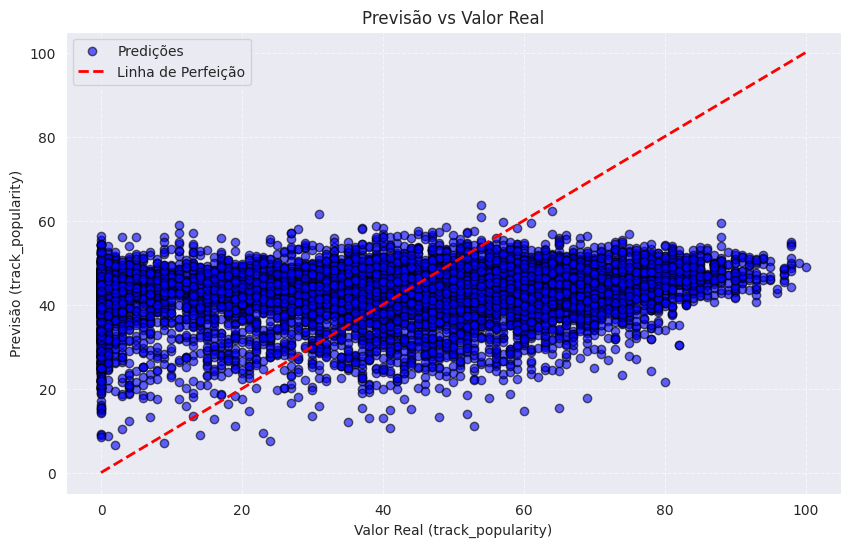

In [ ]:
# Gráfico: Previsão vs Real
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', label='Predições')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Linha de Perfeição')
plt.title('Previsão vs Valor Real')
plt.xlabel('Valor Real (track_popularity)')
plt.ylabel('Previsão (track_popularity)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


O gráfico mostra que as previsões têm grande dispersão em relação aos valores reais, especialmente para valores altos da track_popularity. O modelo tende a subestimar valores altos e superestimar valores baixos, indicando limitações no ajuste.

## Avaliando o modelo de Regressão Linear

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Supondo y_test e y_pred são as variáveis reais e previstas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 20.15
MSE: 579.72
RMSE: 24.08
R²: 0.07


#**6.0 Modelo de Árvore de Decisão**

## Árvore de decisão

In [ ]:
# estamos criando um modelo e dizendo para o algoritmo identificar os 5 vizinhos mais próximos, contar a frequencia da variável resposta nas proximidades e eleger onde ficará aquele ponto
arvore = DecisionTreeClassifier(max_depth=4, criterion='entropy')

In [ ]:
# vamos treinar o modelo na base de treino
arvore.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
# criando as previsões dando como entrada os valores da base de teste
arvore.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# vamos atribuir a previsão num objeto chamado estimado
estimado_arvore = arvore.predict(X_test)

In [ ]:
# vamos atribuir as probabilidades num objeto chamado probs
probs_arvore = arvore.predict_proba(X_test)
probs_arvore

array([[0.04649371, 0.01284357, 0.00642178, ..., 0.00693553, 0.        ,
        0.00025687],
       [0.07991993, 0.01770865, 0.01201109, ..., 0.        , 0.        ,
        0.        ],
       [0.04649371, 0.01284357, 0.00642178, ..., 0.00693553, 0.        ,
        0.00025687],
       ...,
       [0.0822112 , 0.01311127, 0.00744153, ..., 0.        , 0.        ,
        0.        ],
       [0.07991993, 0.01770865, 0.01201109, ..., 0.        , 0.        ,
        0.        ],
       [0.07991993, 0.01770865, 0.01201109, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_pred = arvore.predict(X_test)
y_pred_proba = arvore.predict_proba(X_test)[:, 1]  # Probabilidade da classe positiva


## Avaliando o modelo

In [ ]:
# Previsões dos modelos)
y_pred_tree = arvore.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Tree Metrics: MAE =", mae_tree, ",MSE =", mse_tree," RMSE =", rmse_tree, ", R2 =", r2_tree)

Tree Metrics: MAE = 42.423654822335024 ,MSE = 2424.6486294416245  RMSE = 49.24072125224837 , R2 = -2.8894733378220128


#**7.0 Modelo de KNN**

## K vizinhos mais próximos

In [ ]:
# estamos criando um modelo e dizendo para o algoritmo identificar os 5 vizinhos mais próximos, contar a frequencia da variável resposta nas proximidades e eleger onde ficará aquele ponto
vizinho = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# vamos treinar o modelo na base de treino
vizinho.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# criando as previsões dando como entrada os valores da base de teste
vizinho.predict(X_test)

array([ 0, 17, 62, ..., 24, 67,  0])

In [ ]:
vizinho.predict_proba(X_test)

array([[0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# vamos atribuir a previsão num objeto chamado estimado
estimado = vizinho.predict(X_test)
estimado

array([ 0, 17, 62, ..., 24, 67,  0])

In [ ]:
# vamos atribuir as probabilidades num objeto chamado probs
probs = vizinho.predict_proba(X_test)

## Avaliando o modelo

###Métricas de Perfomance

In [ ]:
# Previsões dos modelos
y_pred_knn = vizinho.predict(X_test)

# Métricas para o modelo KNN
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Exibindo os resultados
print("KNN Metrics: MAE =", mae_knn, ",MSE =", mse_knn, ", RMSE =", rmse_knn, ", R2 =", r2_knn)

KNN Metrics: MAE = 27.633299492385788 ,MSE = 1224.384771573604 , RMSE = 34.99120991868678 , R2 = -0.9640833176589074


###Distribuição de Probabilidades

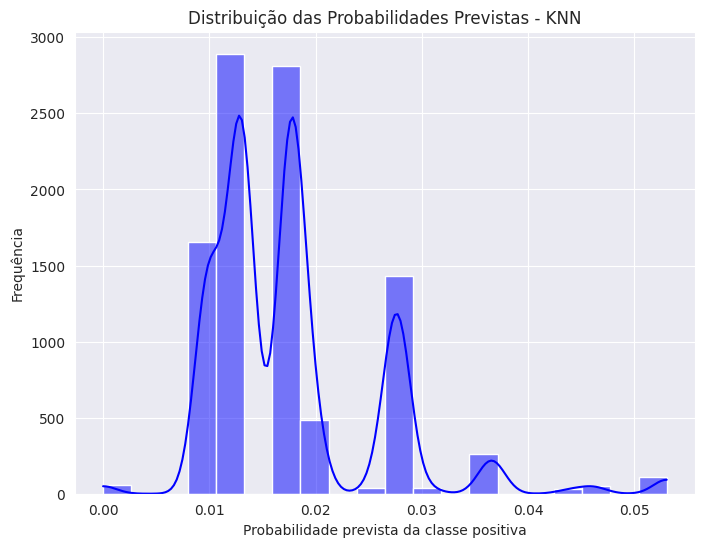

In [ ]:
# Distribuição de Probabilidades
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True, bins=20, color='blue')
plt.xlabel("Probabilidade prevista da classe positiva")
plt.ylabel("Frequência")
plt.title("Distribuição das Probabilidades Previstas - KNN")
plt.show()

O modelo KNN está prevendo probabilidades muito baixas para a classe positiva, com a maior parte das previsões agrupadas entre 0.01 e 0.02. Isso sugere que a separação da classe positiva não é muito forte ou que os dados são altamente desbalanceados, com poucas observações da classe positiva.

# **8.0 Análise de Métricas e Conclusão**
Este projeto teve como objetivo prever a popularidade de uma música, identificando as principais variáveis que influenciam essa decisão, com o intuito de criar um modelo preditivo eficiente para o Spotify.

Foram testados três modelos para isso, — K-Nearest Neighbors (KNN), regressão linear e árvore de decisão —, e sua performance foi comparada com base nas métricas de performance (MAE, MSE, RMSE e R²), buscando identificar o modelo mais adequado para prever a probabilidade da música ser popular.

Análise comparativa e conclusões:
---



In [ ]:
data = {'Modelo': ['Regressão Linear', 'Árvore de Decisão', 'KNN'],
        'MAE': [42.42, 42.42, 27.63],
        'RMSE': [49.24, 49.24, 34.99],
        'MSE': [2424.65, 2424.65, 1224.38],
        'R²': [-2.89, -2.89, -0.96]}
metrics = pd.DataFrame(data)
metrics

Modelo    MAE   RMSE      MSE    R²
0   Regressão Linear  42.42  49.24  2424.65 -2.89
1  Árvore de Decisão  42.42  49.24  2424.65 -2.89
2                KNN  27.63  34.99  1224.38 -0.96

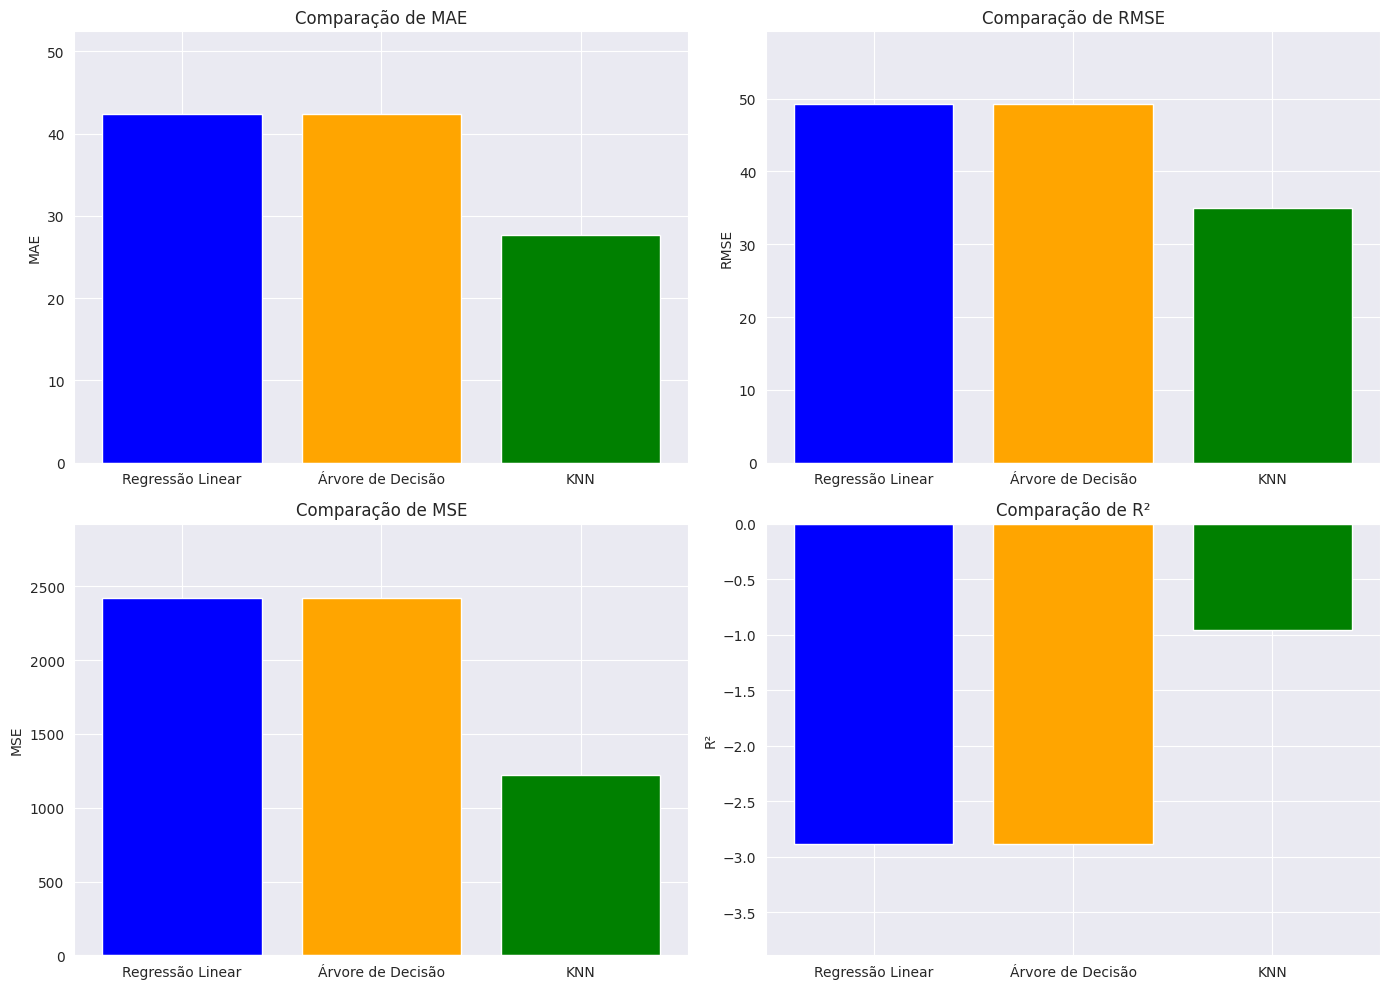

In [ ]:
# Criando gráficos para comparar as métricas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico de MAE
axes[0, 0].bar(metrics['Modelo'], metrics['MAE'], color=['blue', 'orange', 'green'])
axes[0, 0].set_title('Comparação de MAE')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_ylim(0, max(metrics['MAE']) + 10)

# Gráfico de RMSE
axes[0, 1].bar(metrics['Modelo'], metrics['RMSE'], color=['blue', 'orange', 'green'])
axes[0, 1].set_title('Comparação de RMSE')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_ylim(0, max(metrics['RMSE']) + 10)

# Gráfico de MSE
axes[1, 0].bar(metrics['Modelo'], metrics['MSE'], color=['blue', 'orange', 'green'])
axes[1, 0].set_title('Comparação de MSE')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].set_ylim(0, max(metrics['MSE']) + 500)

# Gráfico de R²
axes[1, 1].bar(metrics['Modelo'], metrics['R²'], color=['blue', 'orange', 'green'])
axes[1, 1].set_title('Comparação de R²')
axes[1, 1].set_ylabel('R²')
axes[1, 1].set_ylim(min(metrics['R²']) - 1, 0)

# Ajustando layout
plt.tight_layout()
plt.show()


**Análise por Métrica:**

**- a) Mean Absolute Error (MAE)**
O KNN continua sendo o modelo com menor erro absoluto médio (**27.63**) comparado à Regressão Linear e à Árvore de Decisão (**ambas com 42.42**).
Isso indica que o KNN faz previsões mais próximas dos valores reais na média.

**- b) Mean Squared Error (MSE)**
O KNN tem o menor MSE (**1224.38**), significando que seus erros quadrados médios são menores.
A Regressão Linear e a Árvore de Decisão apresentaram o mesmo valor de MSE (**2424.65**), o que reforça que esses modelos são menos precisos.

**- c) Root Mean Squared Error (RMSE)**
O KNN manteve o menor valor de RMSE (**34.99**) em comparação aos outros dois modelos (**49.24**). Isso reforça que os erros do KNN têm menor magnitude.

**- d) Coeficiente de Determinação (R²)**
O KNN obteve um R² menos negativo (**-0.96**), o que indica que consegue explicar melhor a variância dos dados do que os outros dois modelos.
A Regressão Linear e a Árvore de Decisão apresentam um R² extremamente negativo (**-2.89**), sugerindo que ambos são significativamente piores do que simplesmente usar a média dos valores reais como previsão.


###Conclusão

Por mais que as variáveis não apresentem uma correspondência alta entre elas, fazendo o tratamento da base, feature engineering e clusterização, fez com que a base ficasse mais inteligente para um problema que a regressão por si só teria mais dificuldade em prever.

KNN é claramente o melhor modelo, considerando todas as métricas analisadas (MAE, MSE, RMSE e R²). Ele apresenta menor erro absoluto e quadrado, além de ter um desempenho superior na explicação da variância dos dados.

A Regressão Linear e a Árvore de Decisão apresentaram desempenho idêntico e significativamente inferior ao KNN, indicando que não conseguem capturar adequadamente a relação entre as variáveis nos dados.

Acredito que o uso da técnica de Clusterização contribuiu para que o modelo KNN tivesse mais desempenho, uma vez que o KNN depende de distâncias entre pontos, e a inclusão dessa variável pode ajudar a identificar padrões ou estruturas nos dados que estavam difusas nas variáveis originais.